In [40]:
import csv

transformer_dict = {'male':0, 'female':1,'C':0,'S':1,'Q':2,'':-1}

def getTrainingDataSet(file_path):
    y = []
    with open(file_path) as file_obj:
        reader = csv.reader(file_obj)
        x = list(reader)
    x.pop(0)
    for line in x:
        y.append(line.pop(1))
        line.pop(2)
        line.pop(6)
        line.pop(7)
        line.pop(0)
        line[1] = transformer_dict[line[1]]
        line[-1] = transformer_dict[line[-1]]
        for i in range(len(line)):
            if line[i] == '':
                line[i] = 0
    return x,y




In [41]:
filepath = '../ex3/train.csv'
x_train, y_train = getTrainingDataSet(filepath)

print(x_train)
print(y_train)

[['3', 0, '22', '1', '0', '7.25', 1], ['1', 1, '38', '1', '0', '71.2833', 0], ['3', 1, '26', '0', '0', '7.925', 1], ['1', 1, '35', '1', '0', '53.1', 1], ['3', 0, '35', '0', '0', '8.05', 1], ['3', 0, 0, '0', '0', '8.4583', 2], ['1', 0, '54', '0', '0', '51.8625', 1], ['3', 0, '2', '3', '1', '21.075', 1], ['3', 1, '27', '0', '2', '11.1333', 1], ['2', 1, '14', '1', '0', '30.0708', 0], ['3', 1, '4', '1', '1', '16.7', 1], ['1', 1, '58', '0', '0', '26.55', 1], ['3', 0, '20', '0', '0', '8.05', 1], ['3', 0, '39', '1', '5', '31.275', 1], ['3', 1, '14', '0', '0', '7.8542', 1], ['2', 1, '55', '0', '0', '16', 1], ['3', 0, '2', '4', '1', '29.125', 2], ['2', 0, 0, '0', '0', '13', 1], ['3', 1, '31', '1', '0', '18', 1], ['3', 1, 0, '0', '0', '7.225', 0], ['2', 0, '35', '0', '0', '26', 1], ['2', 0, '34', '0', '0', '13', 1], ['3', 1, '15', '0', '0', '8.0292', 2], ['1', 0, '28', '0', '0', '35.5', 1], ['3', 1, '8', '3', '1', '21.075', 1], ['3', 1, '38', '1', '5', '31.3875', 1], ['3', 0, 0, '0', '0', '7.225

In [42]:
def getTestDataSet(file_path,label_filepath):
    with open(file_path) as file_obj:
        reader = csv.reader(file_obj)
        x = list(reader)
    x.pop(0)
    for line in x:
        line.pop(0)
        line.pop(1)
        line.pop(5)
        line.pop(6)
        line[1] = transformer_dict[line[1]]
        line[-1] = transformer_dict[line[-1]]
        for i in range(len(line)):
            if line[i] == '':
                line[i] = 0

    with open(label_filepath) as file_obj:
        reader = csv.reader(file_obj)
        y = list(reader)
        y.pop(0)
    p_id = list(int(line.pop(0)) for line in y)
    y = list(int(line.pop(0)) for line in y)
    return x,y, p_id

In [43]:
x_test, y_test ,p_id= getTestDataSet('../ex3/test.csv', '../ex3/gender_submission.csv')

print(len(x_test[0]))
print(y_test)

7
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0

In [44]:
import numpy as np

x_train =  np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')
y_train = np.array(y_train).astype('int64')
y_test = np.array(y_test).astype('int64')

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

def train_model(num=10):
    clf = RandomForestClassifier(n_estimators=num, random_state=11)#包含10课树的随机森林
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    return precision_score(y_test,predictions)

In [46]:
precisions = []
max_tree_amount = 100
for tree_amount in range(1,max_tree_amount+1):
    precisions.append(train_model(tree_amount))

In [47]:
from matplotlib import pyplot as plt

def plot(x,y, xlabel, ylabel, title):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x,y)
    plt.show()
    print('the highest {} is {}, and corresponding {} is {}'.format(ylabel,max(y),xlabel,np.argmax(y)+1))

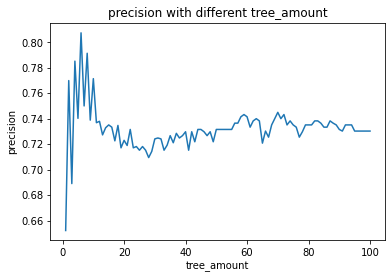

the highest precision is 0.8074074074074075, and corresponding tree_amount is 6


In [48]:
plot(list(range(1,max_tree_amount+1)), precisions,'tree_amount','precision','precision with different tree_amount')


In [49]:
def print_result(p_id, predictions, num):
    print('the result is...')
    for i in range(num):
        if predictions[i] == 0: # means can not survive
            print('the passenger '+str(p_id[i])+' can not survive')
        else:
            print('the passenger '+str(p_id[i])+' can survive')

In [50]:
clf = RandomForestClassifier(n_estimators=6, random_state=11)#包含6课树的随机森林
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print_result(p_id, predictions, 10)


the result is...
the passenger 892 can not survive
the passenger 893 can not survive
the passenger 894 can not survive
the passenger 895 can survive
the passenger 896 can not survive
the passenger 897 can not survive
the passenger 898 can not survive
the passenger 899 can not survive
the passenger 900 can survive
the passenger 901 can not survive
